# Colormodels

We want to convert the RGB images into HSV images to see what effect this has on the clustering method.

### 1.1 Import Libraries 

In [13]:
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
import os

### 1.2 Import custom Funktions for Colormodels

In [14]:
from Functions.Colormodels import rgb_to_hsv
from Functions.Colormodels import hue_channel
from Functions.Colormodels import saturation_channel
from Functions.Colormodels import value_channel
from Functions.Colormodels import plot_hsv_histograms
from Functions.Colormodels import plot_hsv_channels
from Functions.Colormodels import save_hsv_channels
from Functions.Colormodels import display_images
from Functions.Colormodels import save_image
from Functions.Colormodels import hsv_to_rgb



### 1.3 Load Original Images

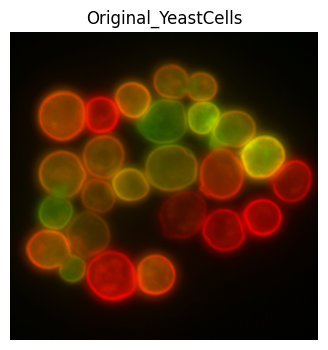

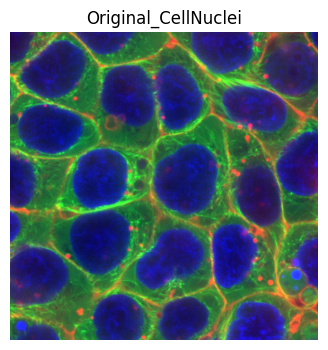

In [15]:
YeastCells = np.copy(plt.imread('Original_Images/Clustering/Data/Yeast_Cells.jpg'))

CellNuclei = np.copy(plt.imread('Original_Images/Clustering/Data/Cell_Nuclei.tiff'))

display_images(YeastCells, "Original_YeastCells")
display_images(CellNuclei, "Original_CellNuclei")


# 2. Convert RGB to HSV

In the following, the RGB images are converted into HSV images. HSV is another color model in addition to RGB, where the images are saved in the three channels **hue**, **saturation** and **value**. This has the advantage that, in contrast to RGB, the hue can be saved independently of the saturation and intensity. The model is therefore more robust against lighting differences such as shadows and overexposure. 

On the one hand, this makes it easy to isolate the yeast cells, as the color is separate from the intensity. You can simply define a certain Hue range (e.g. 0-30 degrees for red) to isolate all red yeast cells and another range for the green cells. On the other hand, the model is also more robust against lighting differences such as shadows. For example, a dark red cells has the same Hue value as a bright red cell.

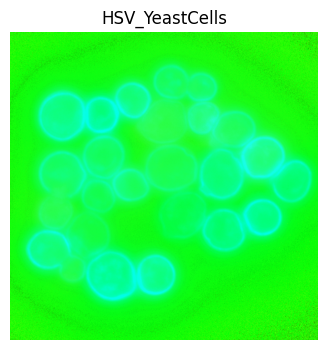

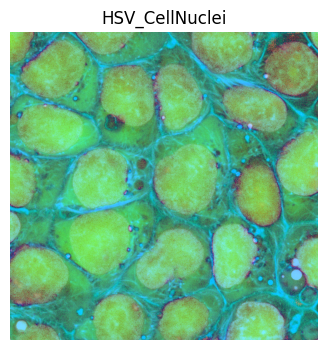

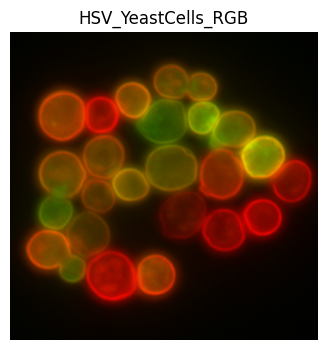

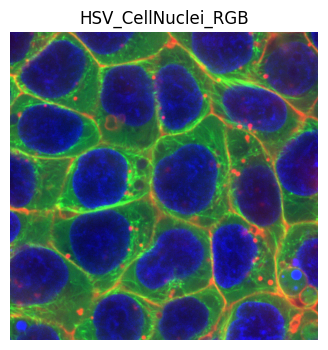

In [16]:


HSV_YeastCells = rgb_to_hsv(YeastCells)
HSV_CellNuclei = rgb_to_hsv(CellNuclei)


display_images(HSV_YeastCells, "HSV_YeastCells")
display_images (HSV_CellNuclei, "HSV_CellNuclei")

HSV_YeastCells_RGB = hsv_to_rgb(HSV_YeastCells)
HSV_CellNuclei_RGB = hsv_to_rgb(HSV_CellNuclei)

display_images(HSV_YeastCells_RGB, "HSV_YeastCells_RGB")
display_images(HSV_CellNuclei_RGB, "HSV_CellNuclei_RGB")

### 2.1 Save HSV images as numpy

In [17]:
#np.save("HSV_YeastCells.npy", HSV_YeastCells)  
#np.save("HSV_CellNuclei.npy", HSV_CellNuclei) 




### 2.2 Save HSV images

In [18]:
#save_image(HSV_YeastCells, "HSV_YeastCells")
#save_image(HSV_CellNuclei, "HSV_CellNuclei")

# 3. Extract the three channels

### 3.1 Extract the channels of CellNuclei

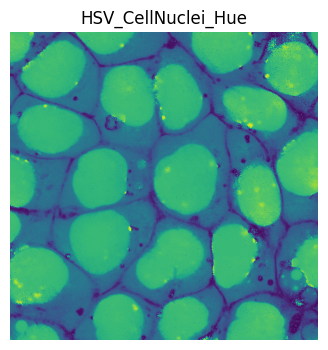

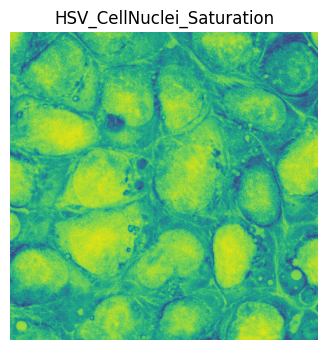

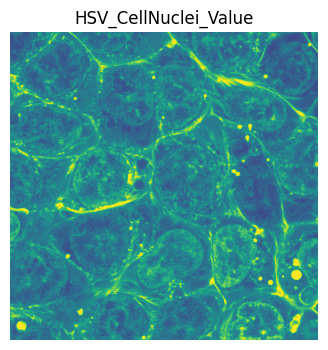

In [19]:
HSV_CellNuclei_Hue = hue_channel(HSV_CellNuclei)
HSV_CellNuclei_Saturation = saturation_channel(HSV_CellNuclei)
HSV_CellNuclei_Value = value_channel(HSV_CellNuclei)
display_images(HSV_CellNuclei_Hue, "HSV_CellNuclei_Hue")
display_images(HSV_CellNuclei_Saturation, "HSV_CellNuclei_Saturation")
display_images(HSV_CellNuclei_Value, "HSV_CellNuclei_Value")

### 3.1.1 Save extracted channels of CellNuclei

In [20]:
#save_image(HSV_CellNuclei_Hue, "HSV_CellNuclei_Hue")
#save_image(HSV_CellNuclei_Saturation, "HSV_CellNuclei_Saturation")
#save_image(HSV_CellNuclei_Value, "HSV_CellNuclei_Value")


### 3.2 Extract the channels of YeastCells

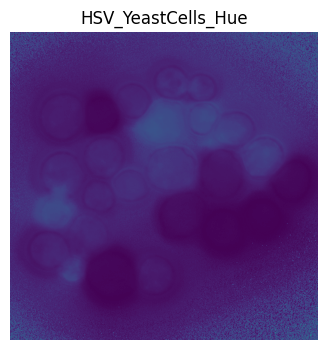

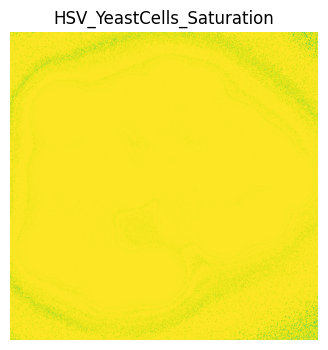

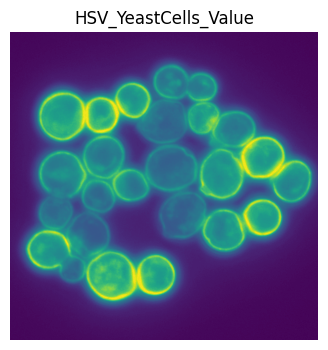

In [21]:
HSV_YeastCells_Hue = hue_channel(HSV_YeastCells)
HSV_YeastCells_Saturation = saturation_channel(HSV_YeastCells)
HSV_YeastCells_Value = value_channel(HSV_YeastCells)
display_images(HSV_YeastCells_Hue, "HSV_YeastCells_Hue")
display_images(HSV_YeastCells_Saturation, "HSV_YeastCells_Saturation")
display_images(HSV_YeastCells_Value, "HSV_YeastCells_Value")

### 3.2.2 Save extraced channels of YeastCells

In [22]:
#save_image(HSV_YeastCells_Hue, "HSV_YeastCells_Hue")
#save_image(HSV_YeastCells_Saturation, "HSV_YeastCells_Saturation")
#save_image(HSV_YeastCells_Value, "HSV_YeastCells_Value")

### 3.3 Plot HSV channels

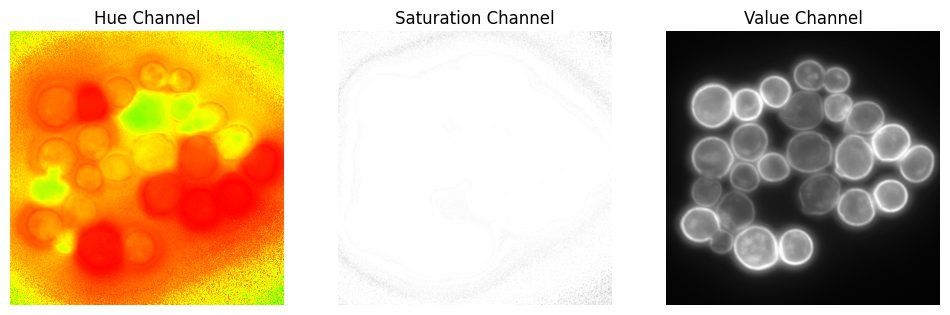

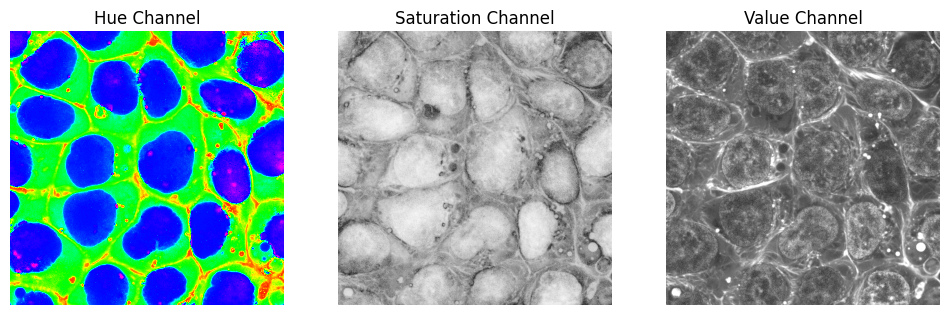

(array([[[126, 227, 129],
         [129, 233, 103],
         [126, 246, 162],
         ...,
         [122, 236, 177],
         [123, 241, 212],
         [120, 229, 159]],
 
        [[131, 199,  82],
         [130, 244,  94],
         [129, 241,  91],
         ...,
         [125, 237, 141],
         [124, 244, 121],
         [121, 237, 138]],
 
        [[126, 190,  59],
         [127, 244, 121],
         [125, 243, 127],
         ...,
         [122, 241, 203],
         [124, 240, 174],
         [124, 237, 127]],
 
        ...,
 
        [[111, 184, 147],
         [109, 183, 135],
         [112, 190, 156],
         ...,
         [123,  96, 135],
         [105,  76, 118],
         [120,  70, 121]],
 
        [[115, 192, 194],
         [110, 190, 141],
         [105, 169, 121],
         ...,
         [120, 124, 144],
         [116,  78, 115],
         [128,  98, 138]],
 
        [[116, 211, 255],
         [111, 209, 156],
         [110, 167, 124],
         ...,
         [117,  97, 124],
  

In [23]:
plot_hsv_channels(HSV_YeastCells)
plot_hsv_channels(HSV_CellNuclei)

### 3.3 Plot HSV histograms

In this step, a histogram showing the distribution of pixel values was created for each channel. The histograms make it possible to identify the channel that allows for the best possible separation between the image areas. Several defined peaks show that the pixel values are divided into clearly separated groups and can therefore be clearly segmented.

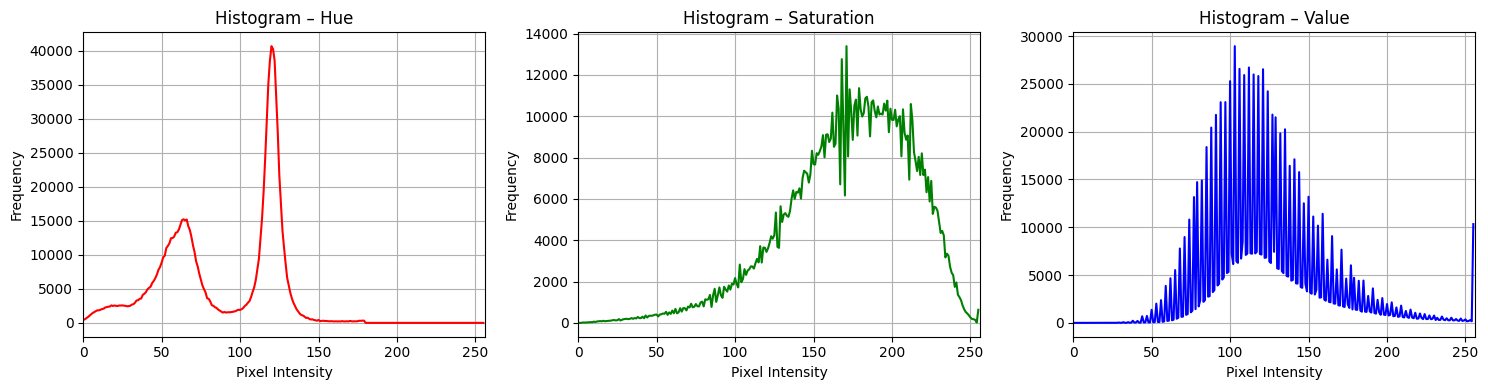

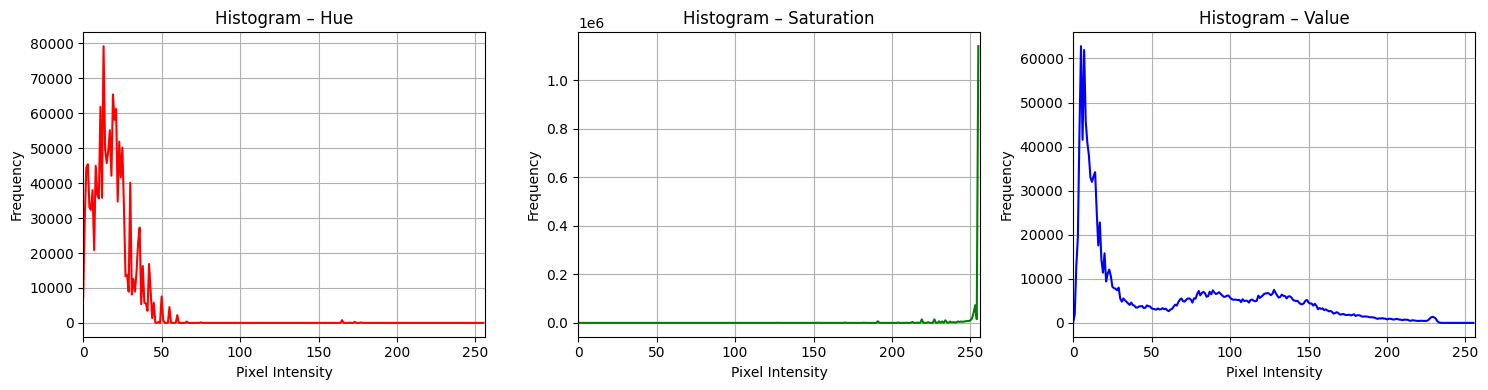

In [24]:
plot_hsv_histograms(HSV_CellNuclei)
plot_hsv_histograms(HSV_YeastCells)
